In [1]:
%matplotlib notebook
import numpy as np
import pylab as plt

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from scipy.optimize import curve_fit

from scipy.ndimage import gaussian_filter1d
from galaxies_widget import *

t = np.linspace(0, 13e9, 20)

## Closed Box Model

As seen in lecture and highlighted in problem set 3, the closed box model of chemical evolution of a stellar population attempts to model the metallicity of the ISM by making a few assumptions:

- The system is closed to the rest of the galaxy (i.e. no inflows or outflows of gas)
- The system begins entirely composed of gas and is turned into stars over time through some efficiency.
- Stars instantly return metals to the ISM at some yield $p$

Assuming that the IMF is constant in time, we should expect that 

## Leaky Box Model

In reality, the closed box model doesn't reflect the true metallicity distribution in the ISM. There are a number of likely reasons for this, one being the fact that the ISM is subject to inflows and outflows of material. In this model of the ISM, we assume that gas is driven out of the ISM through stellar winds in supernova explosions. It has also been observed that some fraction of outflow gas can be driven back into the system, returning metal-rich material to the ISM. We parameterize this process as,

\begin{equation}
    \dot{M}_{\mathrm{outflow}} = (\eta - r)\,\dot{M}_*
\end{equation}

where $\eta$ is known as the outflow efficiency and $r$ is the recycling fraction. This leads to a relation between the change in stellar mass and change in gas mass as 

\begin{align}
    \dot{M}_g & = -\dot{M}_* - \dot{M}_{\mathrm{outflow}}\\
              & = -(1+\eta - r)\,\dot{M}_*\,.
\end{align}

We can write this in terms of $Z$ by noting that $\dot{M}_Z = (p - Z - (\eta - r) Z) \dot{M}_g$,

\begin{equation}
    \dot{Z} = -p'\,\frac{\dot{M}_g}{M_g}.
\end{equation}

where $p' = (1 + \eta - r)^{-1}$. We can write this in terms of metallicity as a function of time by noting that $\dot{Z} / \dot{M} = Z / M_*$,

\begin{equation}
    Z(t) = -{p \over 1+\eta - r}\,\ln\left[\frac{M_g(t)}{M_g(0)}\right]\,.
\end{equation}

Finally, we can write this as a metallicity distribution by making the same assumptions we did in problem set 3

\begin{equation}
    \frac{dZ}{d[M/H]} = Z \exp(-Z/p').
\end{equation}

As you'll see below, this distribution is similar in shape to the closed-box model, but does solve the problem of an overly metal-rich ISM.

## Accreting Box Model

One way we can try the modify the metallicity distribution to more closely match what is observed is by assuming that our box slowly accretes pristine gas from outside the ISM. In the simple version of this model, we assuming that the total gas amount of gas in the box is constant with time. This assumption probably isn't totally accurate but simplifies the math. In principle, you can vary the amount of gas being accreted and the time at which the accretion takes place to better fit other observables. To start, we do the same as above while assuming a a constant gas mass in the ISM 

\begin{equation}
    \dot{Z} = (p - z)\frac{\dot{M_*}}{M_g}
\end{equation}

Now we can turn this into an expression for the metallicity by noting that $\dot{Z} / \dot{M} = Z / M_*$ and integrating the result with respect to the total mass

\begin{equation}\label{eq-accretingbox-zM-outflow-recycling}
    Z = {p \over 1+\eta-r}\,\left\{1-\exp\left(\left[{1+\eta-r \over 1-r}\right]\,\left[1-{M \over M_g}\right]\right)\right\}
\end{equation}

Now by making the same assumption we did above and in problem set 3 we can modify the above expression to obtain the metallicity distribution below,

\begin{equation}
    {\mathrm{d} N \over \mathrm{d} Z} \propto {1 \over p'-Z}
\end{equation}

\begin{equation}
    {\mathrm{d} N \over \mathrm{d} Z} \propto {Z \over p'-Z}
\end{equation}

where $p' = (1 + \eta - r)^{-1}$.


## Fitting

<IPython.core.display.Javascript object>


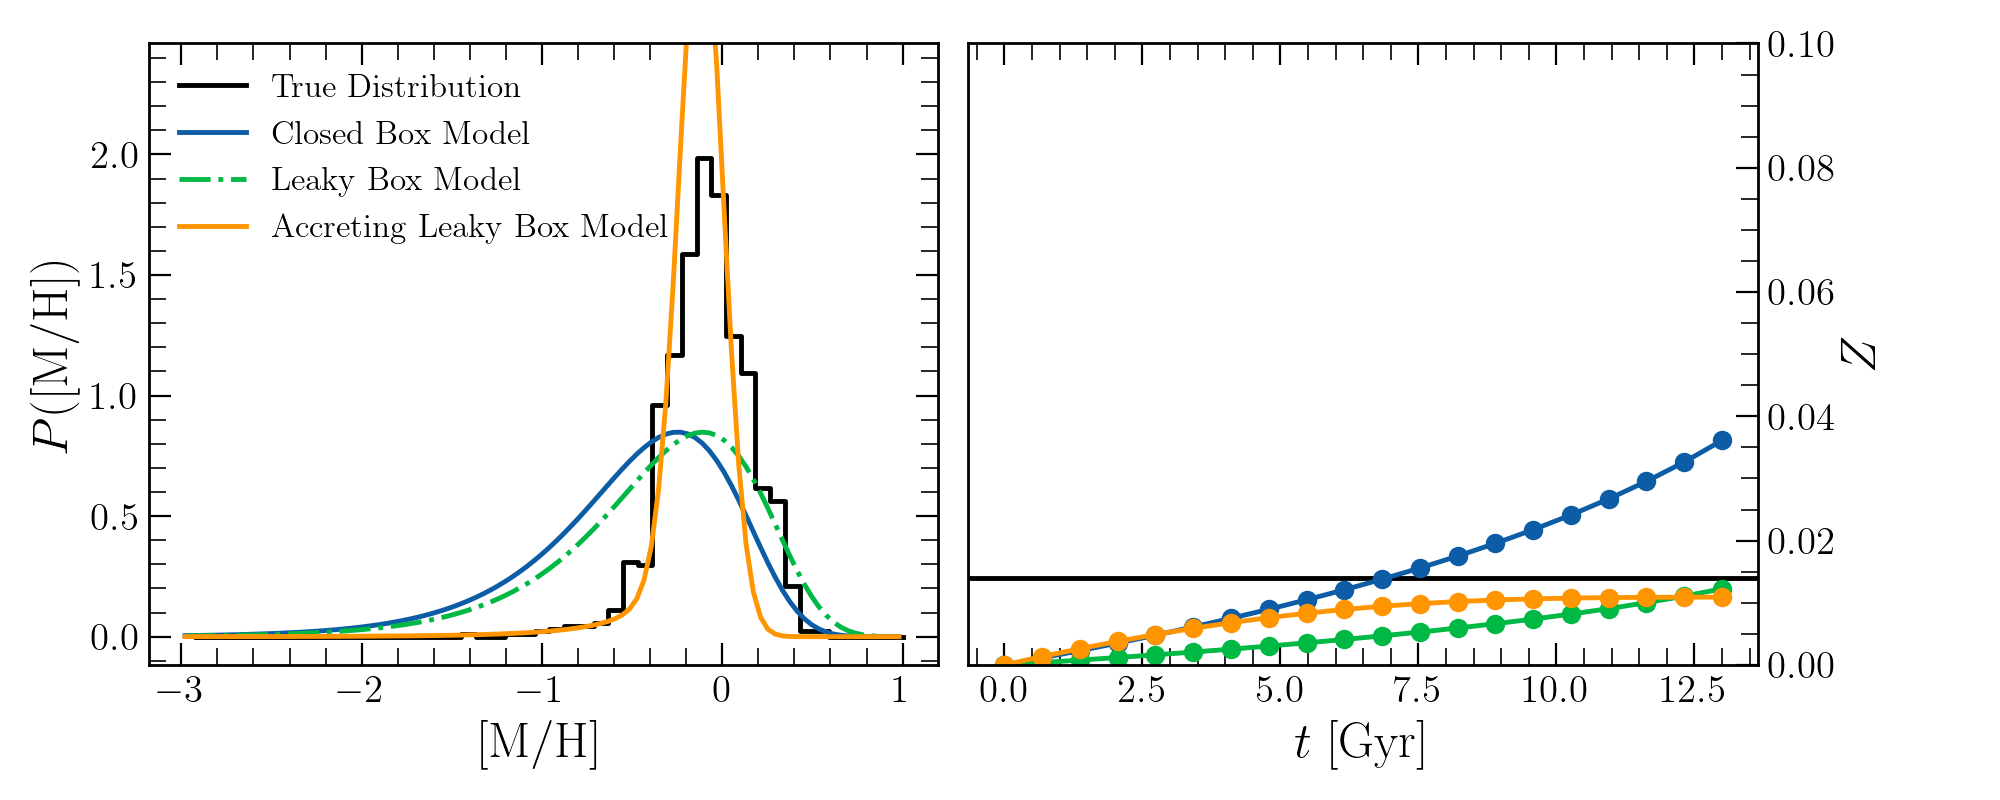

interactive(children=(FloatSlider(value=0.035, description='z_yield', max=0.2, step=0.01), FloatSlider(value=2…

<function __main__.update(z_yield=0.035, eta=2.5, r=0.4)>

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
ax1, ax2 = axs[0], axs[1]

ti = t / 1e9

# True Distribution
c, b = get_sn_xhdist("Mg", bins=np.linspace(-3, 1, 50))
line1, = ax1.step(b + np.diff(b)[0] / 2, c / np.trapz(c, b), label='True Distribution', color='k')

# Fit Distribution -> Closed
c, b = get_sn_xhdist("Mg", bins=np.linspace(-3, 1, 100))
dN = metallicity_distribution(10 ** b)
line2, = ax1.plot(b, dN / np.trapz(dN, b), label='Closed Box Model')

# Fit Distribution -> Leaky
dN = metallicity_distribution_leaky(10 ** b)
line3, = ax1.plot(b, dN / np.trapz(dN, b), label='Leaky Box Model', ls='-.')


# Fit Distribution -> Leaky Accreting
dN = metallicity_distribution_accreting_leaky(10 ** b)
k = gaussian_filter1d(np.abs(dN), 3)
line4, = ax1.plot(b, k / np.trapz(k, b), label='Accreting Leaky Box Model')
ax1.legend(frameon=False, fontsize=12)
ax1.set_xlabel(r'$[\rm M/H]$')
ax1.set_ylabel(r'$P([\rm M/H])$')

ax2.axhline(Zsolar, color='k', label=r'$Z_{\odot}$')
line5, = ax2.plot(ti, calc_metallicity(t), marker='o')
line6, = ax2.plot(ti, calc_metallicity_leaky(t), marker='o')
line7, = ax2.plot(ti, calc_metallicity_accreting_leaky(t), marker='o')

ax2.set_ylim([0, 0.1])
ax2.yaxis.tick_right()
ax2.set_xlabel(r'$t$ [Gyr]')
ax2.set_ylabel(r'$Z$', labelpad=-330)
fig.tight_layout()


def update(z_yield=0.035, eta=2.5, r=0.4):
    """
    """ 
    dN = metallicity_distribution_leaky(10 ** b, z_yield=z_yield)
    line2.set_ydata(dN / np.trapz(dN, b))
    
    dN = metallicity_distribution_leaky(10 ** b, z_yield=z_yield, eta=eta, r=r)
    line3.set_ydata(dN / np.trapz(dN, b))
    
    dN = metallicity_distribution_accreting_leaky(10 ** b, z_yield=z_yield, eta=eta, r=r)
    k = gaussian_filter1d(np.abs(dN), 3)
    line4.set_ydata(k / np.trapz(k, b))
    
    
    g = calc_metallicity_accreting_leaky(t, z_yield=z_yield, eta=eta, r=r)
    h = calc_metallicity_leaky(t, z_yield=z_yield, eta=eta)
    i = calc_metallicity(t, z_yield=z_yield)
    line5.set_ydata(i)
    line6.set_ydata(h)
    line7.set_ydata(g)
    
    fig.canvas.draw()


interact(update, z_yield=(0.0, 0.2, 0.01), eta=(0, 5, 0.05), r=(0, 0.9, 0.05))

This solves two major problems with the closed box model in relation to the metallicities of stars in the stellar neighborhood:

- The lack of metal-poor stars can now be explained by the accretion of pristine gas into the interstellar medium
- The low abundance of relatively low abundance of metals in the interstellar medium is explained by outflows and recycling of metal-rich gas

<IPython.core.display.Javascript object>


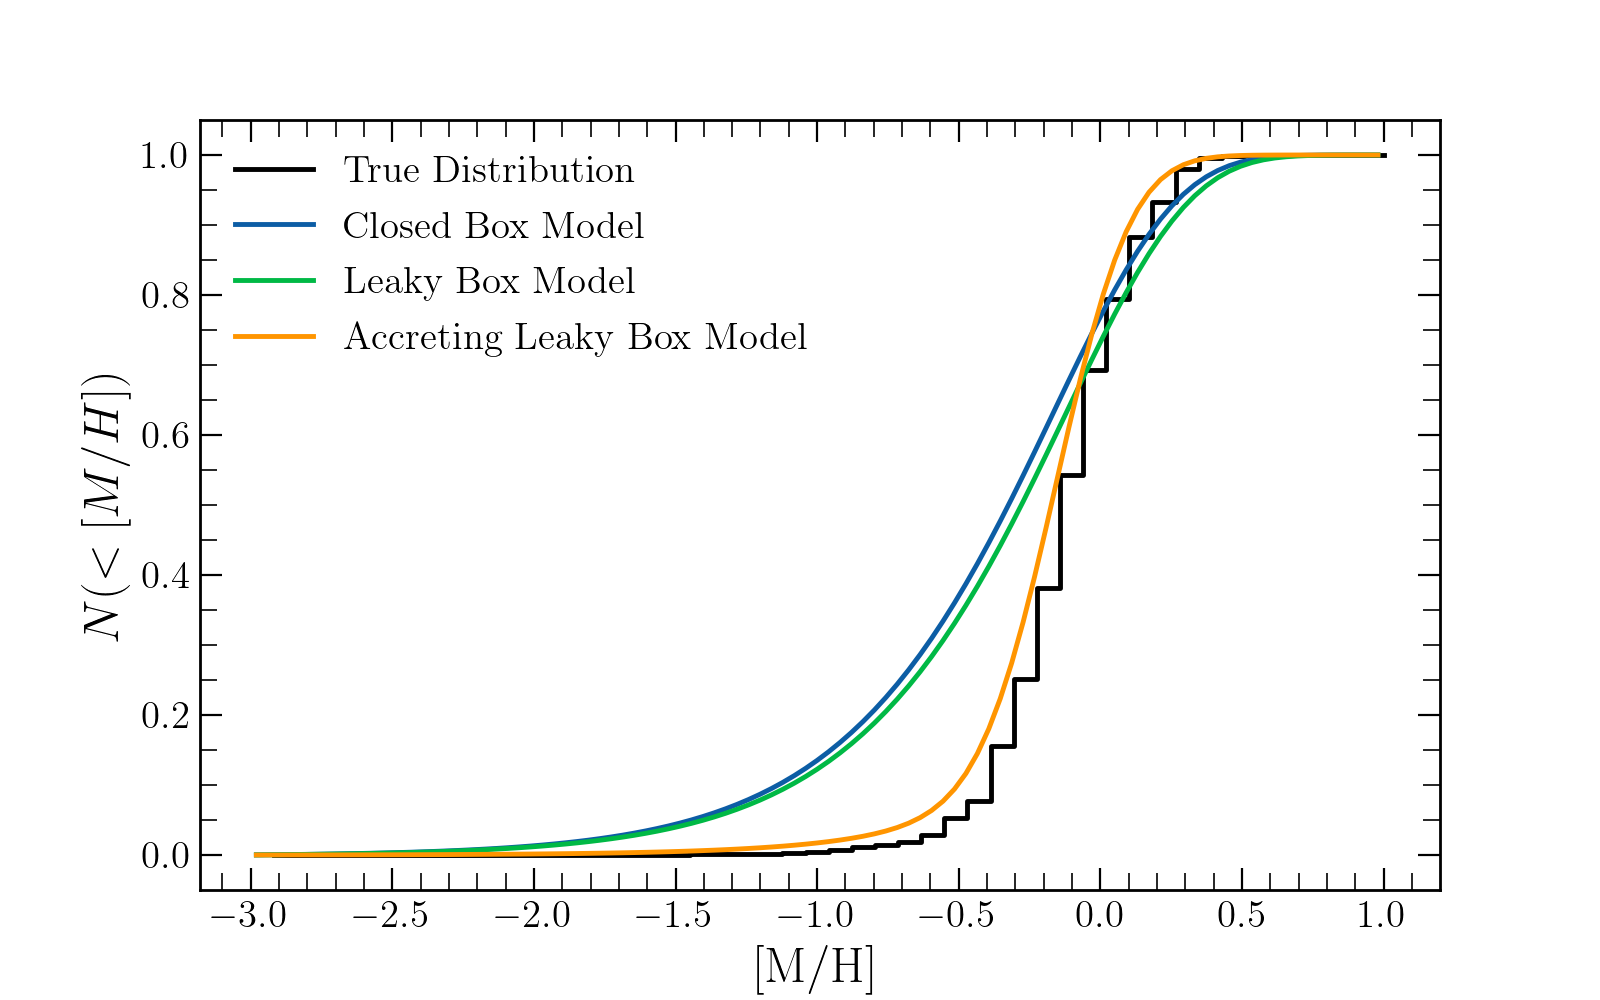

interactive(children=(FloatSlider(value=0.1, description='z_yield', max=0.2, step=0.01), FloatSlider(value=2.5…

<function __main__.update(z_yield=0.1, eta=2.5, r=0.4)>

In [4]:
fig = plt.figure(figsize=(8, 5))
ax1 = plt.subplot(111)

c, b = get_sn_xhdist("Mg", bins=np.linspace(-3, 1, 50))
line1, = ax1.step(b + np.diff(b)[0] / 2, np.cumsum(c / np.trapz(c, b)) / np.sum(c / np.trapz(c, b)), label='True Distribution', color='k')

# Fit Distribution -> Closed
c, b = get_sn_xhdist("Mg", bins=np.linspace(-3, 1, 100))
dN = metallicity_distribution(10 ** b)
line2, = ax1.plot(b, np.cumsum(dN / np.trapz(dN, b)) / np.sum(dN / np.trapz(dN, b)), label='Closed Box Model')

# Fit Distribution -> Leaky
dN = metallicity_distribution_leaky(10 ** b)
line3, = ax1.plot(b, np.cumsum(dN / np.trapz(dN, b)) / np.sum(dN / np.trapz(dN, b)), label='Leaky Box Model')

# Fit Distribution -> Leaky Accreting
dN = metallicity_distribution_accreting_leaky(10 ** b)
k = gaussian_filter1d(np.abs(dN), 5)
line4, = ax1.plot(b, k / np.trapz(k, b) / np.sum(dN / np.trapz(dN, b)), label='Accreting Leaky Box Model')

ax1.set_xlabel(r'$[\rm M/H]$')
ax1.set_ylabel(r'$N(< [M/H])$')
ax1.legend(frameon=False, fontsize=14)

def update(z_yield=0.1, eta=2.5, r=0.4):
    """
    """        
    dN = metallicity_distribution_leaky(10 ** b, z_yield=z_yield, eta=eta)
    line3.set_ydata(np.cumsum(dN / np.trapz(dN, b)) / np.sum(dN / np.trapz(dN, b)))
    
    dN = metallicity_distribution_accreting_leaky(10 ** b, z_yield=z_yield, eta=eta, r=r)
    k = gaussian_filter1d(np.abs(dN), 5)
    line4.set_ydata(np.cumsum(k / np.trapz(k, b)) / np.sum(k / np.trapz(dN, b)))

    fig.canvas.draw()

    
interact(update, z_yield=(0.0, 0.2, 0.01), eta=(0, 5, 0.05), r=(0, 0.9, 0.05))

<IPython.core.display.Javascript object>


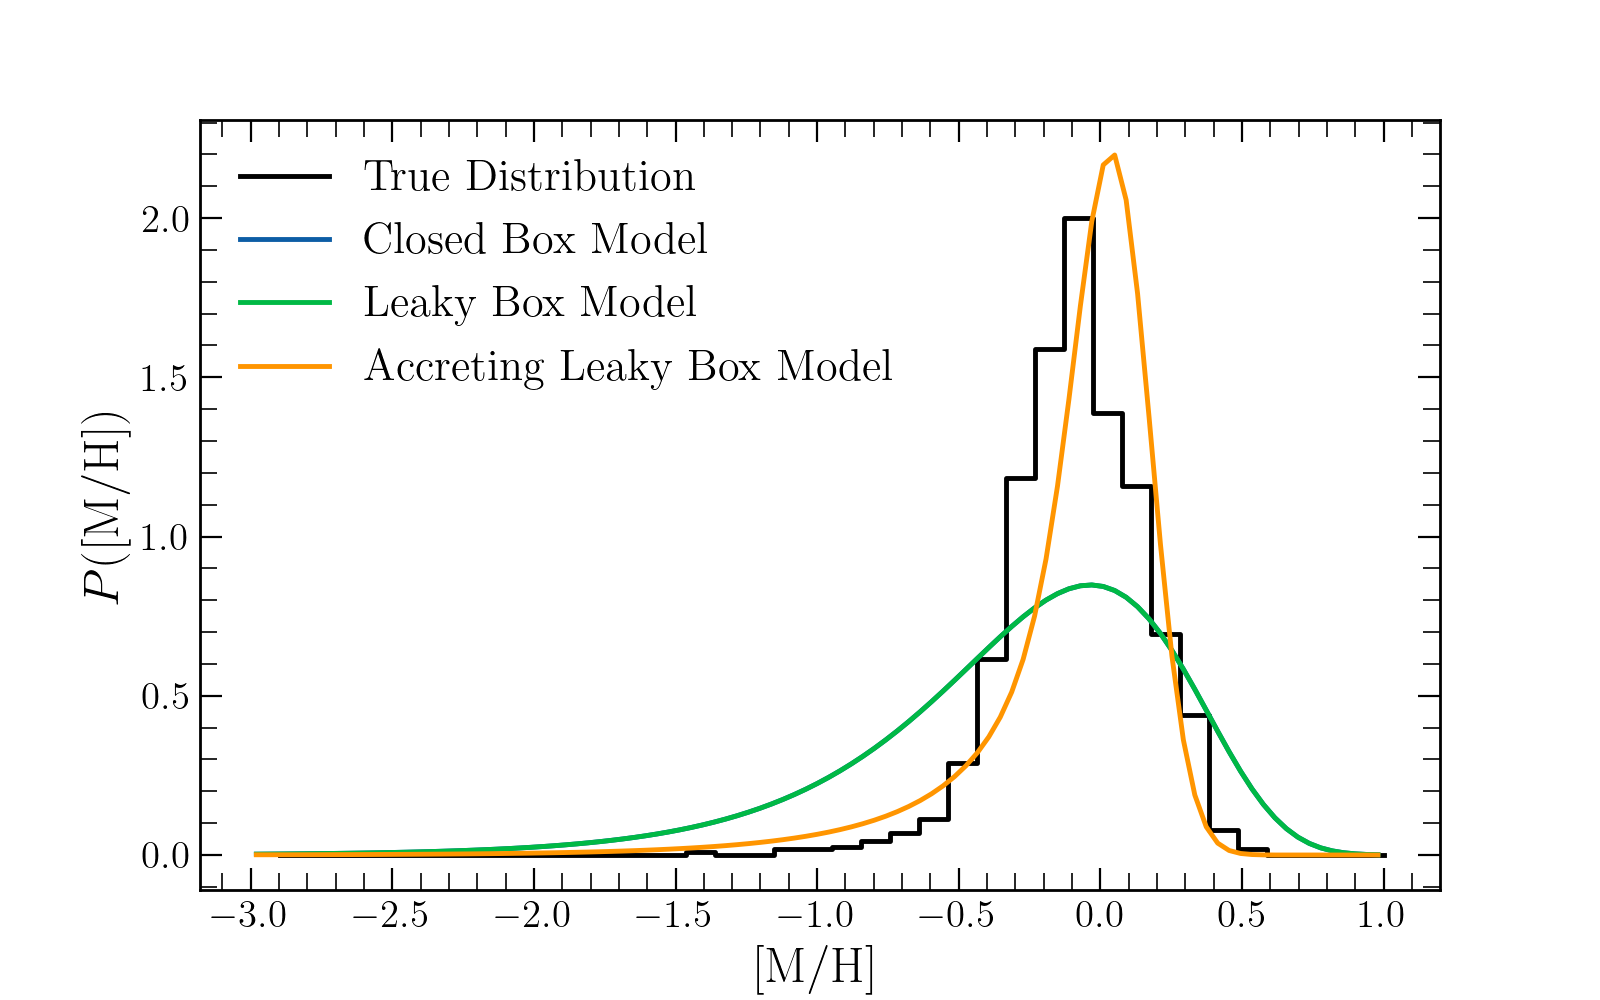

[0.10504212 4.99565616 0.45039095] [[ 2.25550822e-18 -1.28306953e-10  1.28306940e-10]
 [-1.28306953e-10  1.02306714e-02 -1.02306704e-02]
 [ 1.28306940e-10 -1.02306704e-02  1.02306693e-02]]


In [7]:
plt.figure(figsize=(8, 5))


# True Distribution
c, b = get_sn_xhdist("Mg", bins=np.linspace(-3, 1, 40))
plt.step(b + np.diff(b)[0] / 2, c / np.trapz(c, b), label='True Distribution', color='k')

# Fit Distribution -> Closed
c, b = get_sn_xhdist("Mg", bins=np.linspace(-3, 1, 100))
popt, pcov = curve_fit(fit_closed, b, c / np.trapz(c, b), bounds=((0.001), (0.4)))
dN = metallicity_distribution(10 ** b, z_yield=popt[0])
plt.plot(b, dN / np.trapz(dN, b), label='Closed Box Model')

# Fit Distribution -> Leaky
popt, pcov = curve_fit(fit_leaky, b, c / np.trapz(c, b))
dN = metallicity_distribution_leaky(10 ** b, z_yield=popt[0], eta=popt[1])
plt.plot(b, dN / np.trapz(dN, b), label='Leaky Box Model')


# Fit Distribution -> Leaky Accreting
popt, pcov = curve_fit(
    fit_accreting_leaky, b, c / np.trapz(c, b), bounds=((0.001, 0, 0), (0.2, 10, 0.9))
)
print(popt, pcov)
dN = metallicity_distribution_accreting_leaky(10 ** b, *popt)
k = gaussian_filter1d(np.abs(dN), 3)
plt.plot(b, k / np.trapz(k, b), label='Accreting Leaky Box Model')
plt.legend(frameon=False, fontsize=16)

plt.xlabel(r'$[\rm M/H]$')
plt.ylabel(r'$P([\rm M/H])$')
plt.show()